In [1]:
from brainways_datamodule import BrainwaysDataModule
from single_dataset import BrainwaysSingleDataset
import matplotlib.pyplot as plt
import torch
from data_source import DataSource
import random
from dataset_utils import create_atlas_slice
from dataset_utils import load_atlas_reference
import numpy as np
from pathlib import Path

In [2]:
def get_display_image(image: torch.Tensor | np.ndarray):
    if isinstance(image, torch.Tensor):
        image = image.cpu().numpy()
        if len(image.shape) == 3:
            image = image.transpose([1, 2, 0])

    assert isinstance(image, np.ndarray)
    return (image - image.min()) / (image.max() - image.min())

def display_dataset(dataset: BrainwaysSingleDataset, atlas_reference: np.ndarray, num_samples: int = 10):
    samples_indices = random.sample(range(len(dataset)), num_samples)

    fig, axs = plt.subplots(num_samples, 2, figsize=(10, 5 * num_samples))

    for i, sample_index in enumerate(samples_indices):
        sample = dataset[sample_index]
        im = axs[i, 0].imshow(get_display_image(sample["image"]), cmap="gray")
        image_path = Path(dataset._labels.loc[sample_index, "filename"])
        axs[i, 0].set_title(image_path.name)
        axs[i, 0].axis("off")

        atlas_image = create_atlas_slice(
            int(sample["ap"]), atlas=atlas_reference
        )
        axs[i, 1].imshow(get_display_image(atlas_image), cmap="gray")
        axs[i, 1].set_title("atlas")
        axs[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

In [8]:
transform = BrainwaysDataModule.define_train_transform()
mouse_dataset = BrainwaysSingleDataset(
    data_sources=[
        DataSource(
            images_path="/data/cfos/allen",
            labels_path="/home/ben/python/brm2/data/allen/train_labels.csv",
            atlas_name="allen_mouse_25um",
        )
    ],
    transform=transform,
)
mouse_atlas_reference = load_atlas_reference("allen_mouse_25um")
len(mouse_dataset)

176778

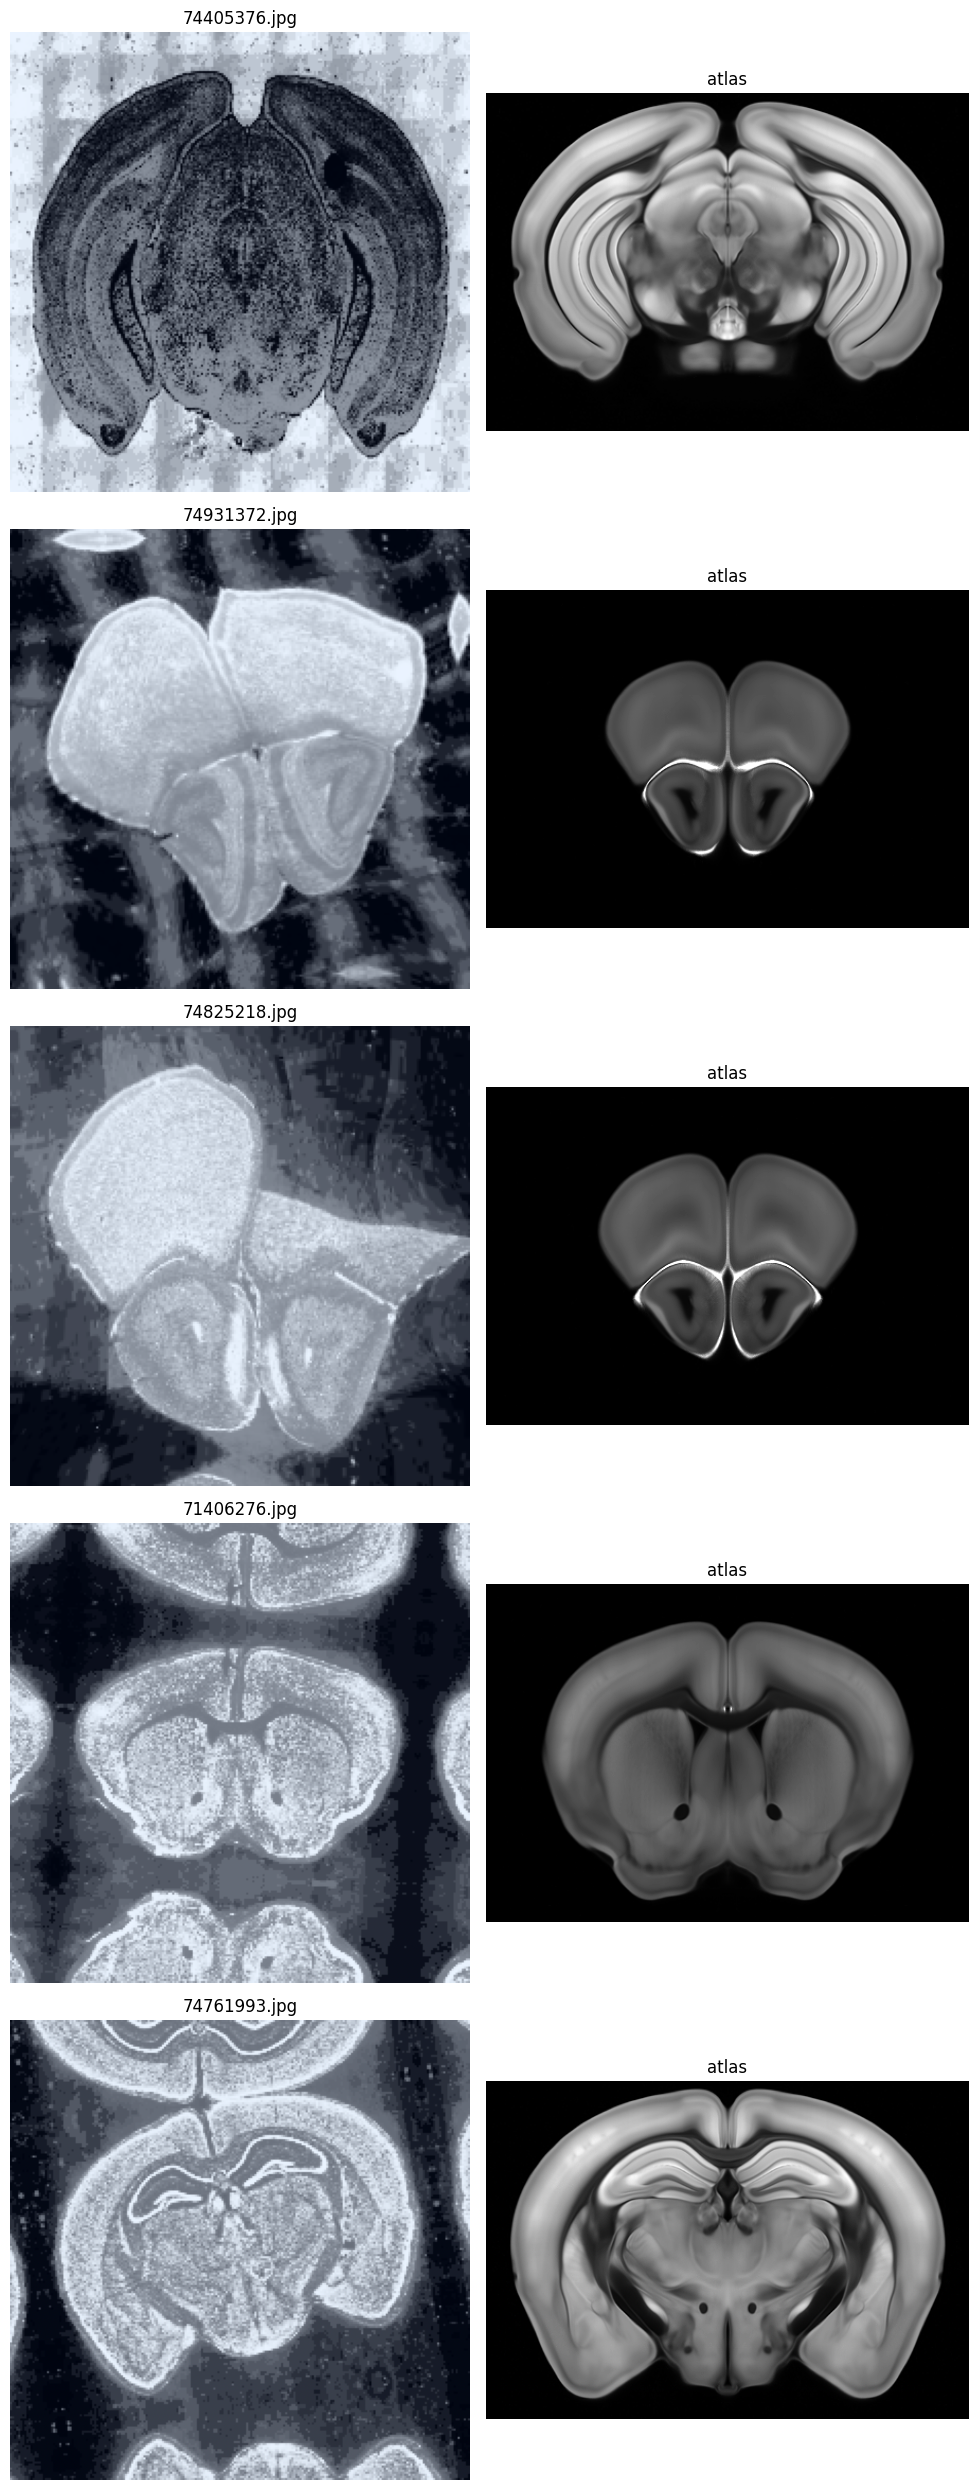

In [13]:
display_dataset(mouse_dataset, mouse_atlas_reference, num_samples=5)

In [10]:
rat_dataset = BrainwaysSingleDataset(
    data_sources=[
        DataSource(
            images_path="/home/ben/brainways/brainways-reg-model/data/real/val/images",
            labels_path="/home/ben/brainways/brainways-reg-model/data/real/val/labels.csv",
            atlas_name="whs_sd_rat_39um",
        )
    ],
    transform=transform,
)
rat_atlas_reference = load_atlas_reference("whs_sd_rat_39um")
len(rat_dataset)

Bg_atlasapi: whs_sd_rat_39um version 1.0 is not the latest available (1.1). To update the atlas run in the 
terminal:
    brainglobe update -a whs_sd_rat_39um

128

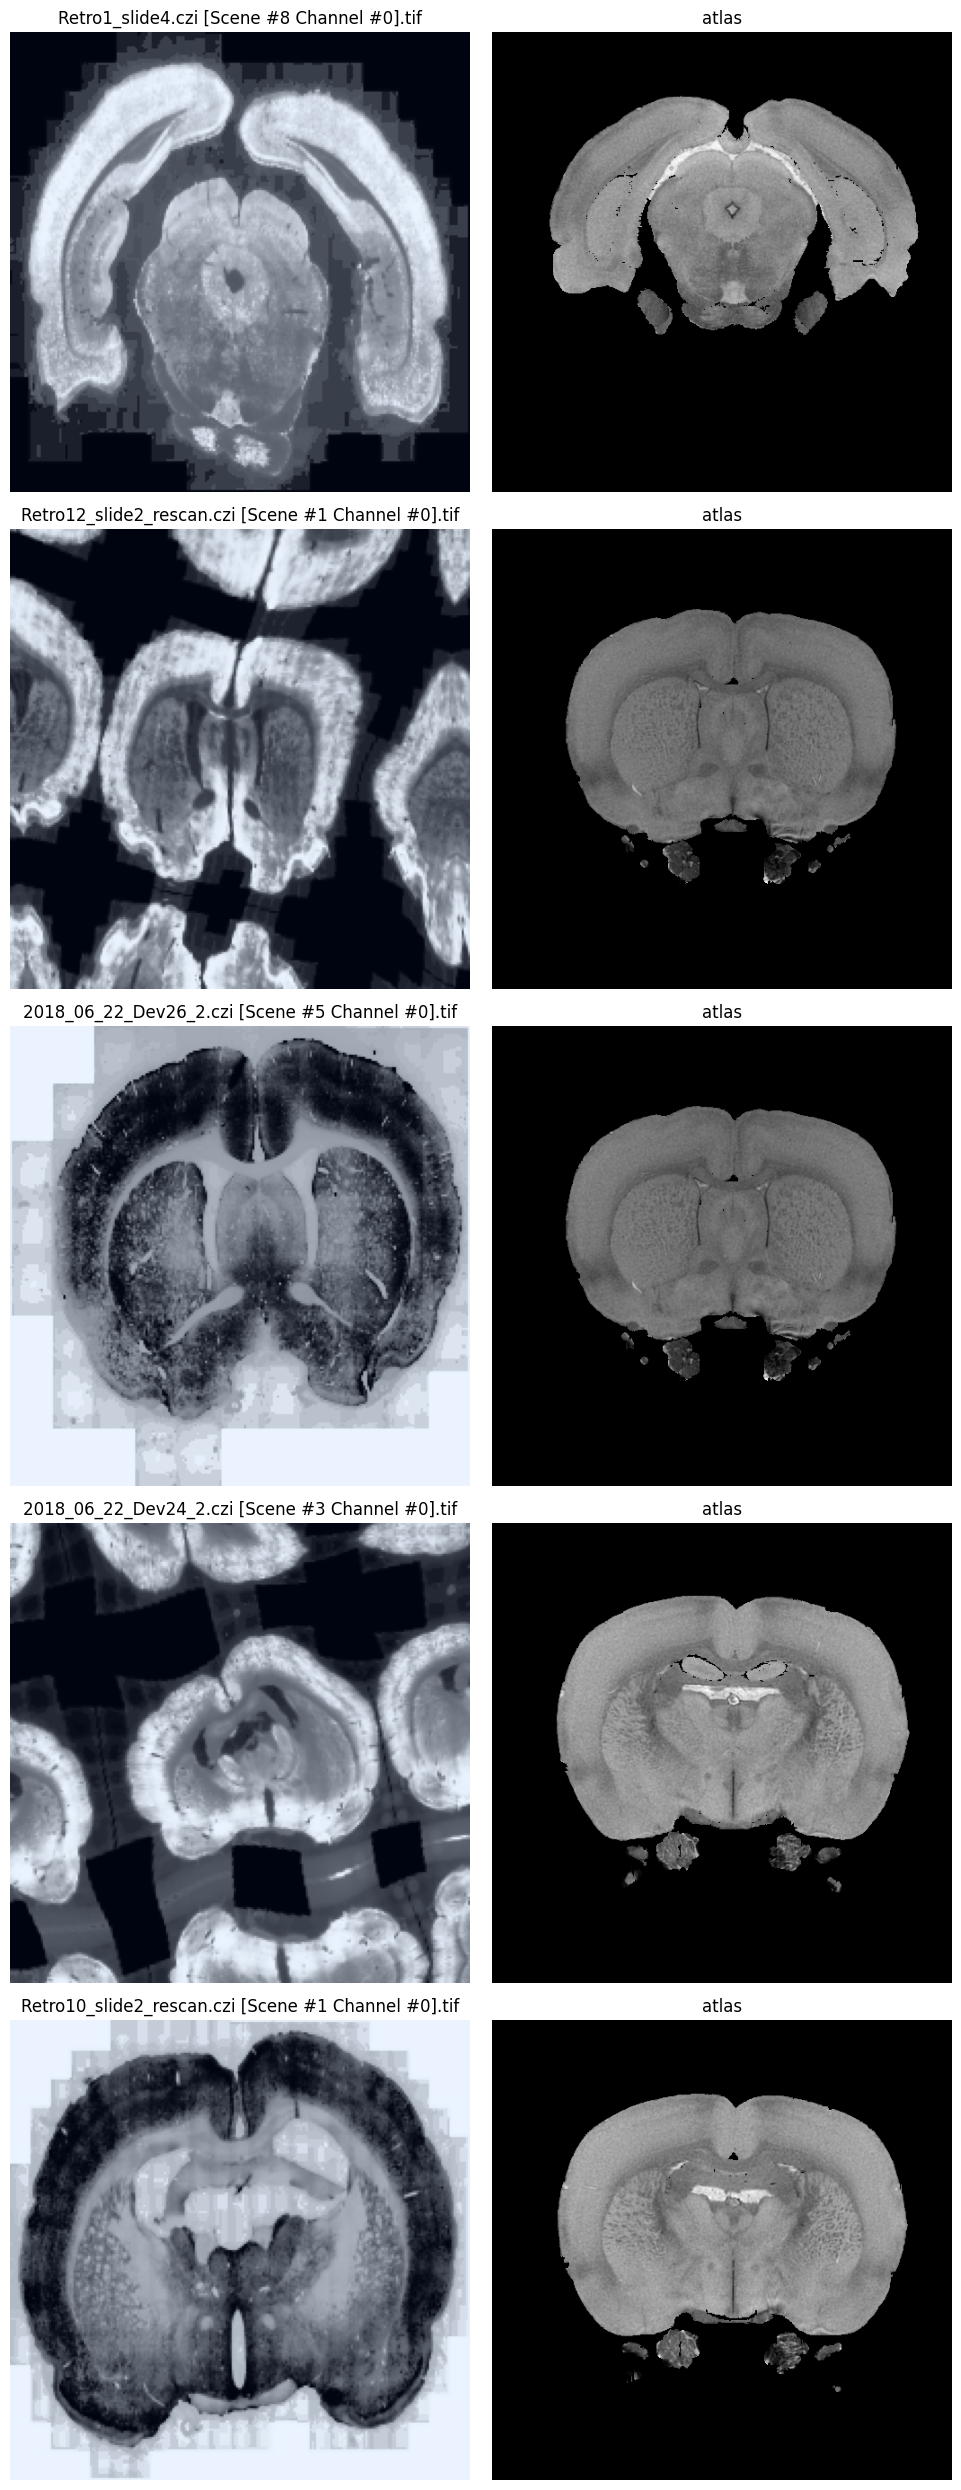

In [12]:
display_dataset(rat_dataset, rat_atlas_reference, num_samples=5)